# Capstone A 


We harnessed NLP approaches to identify and classify the online bully comments. Various machine learning models including naive bayes classifier and LSTM has been applied. 
Fall 2019


<a id="top"></a>

## Contents

* <a href="#abstract">Abstract</a>
* <a href="#intro">Introduction</a>
* <a href="#methods">Methods</a>
* <a href="#data">Data</a>
* <a href="#results">Results</a>
* <a href="#conclude">Conclusion</a>
* <a href="#ref">References</a>


* <a href="#append">Appendix</a>

<a id="abstract"></a>
## Abstract

<a href="#top">Back to Top</a>

abcd

<a id="intro"></a>
## Introduction

<a href="#top">Back to Top</a>

abcd

<a id="background"></a>
## Methods

<a href="#top">Back to Top</a>

abcd


<a id="lib"></a>
## Libraries

<a href="#top">Back to Top</a>

In [1]:

#Basic/Standard

import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

#StatsModel
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

#NLP

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import Normalizer
from pickle import load

from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.base import BaseEstimator,TransformerMixin

import nltk
nltk.download('stopwords')


from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import Normalizer
from pickle import load

from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.base import BaseEstimator,TransformerMixin

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarazaheri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> Describe the detail of the NLTK library in your writeup. This is a crucial component of the work and bears some attention in the writeup.

> Why did you use NLTK, what other alternatives were available? 

> What does current literature say about NLTK?

> Describe NLTK?

NLTK is a string processing library. It takes strings as input and returns strings or lists of strings as output. It alos performs for sentence tokenizations to break and return a list of inputs for further analysis. It has been know for wide language support. We identified the first step of solving of our problem, is breaking the sentence to word pieces, and clean the list of words. Then, use the pool of the words for statistical analysis, and fed to tf-idf bayes classifier based on word frequency. We needed to sentence tokenizer to get task done. NLTK was designed for this task. There are other libraries such as spaCy that known to perform fster but has limited language use, and under perform for sentence tokenizer compared to NLTK. 


<a id="data"></a>
## Data

<a href="#top">Back to Top</a>

### Read in the data file

In [2]:
df = pd.read_csv("data/train.csv")

> Describe the dataset

> It is approximately 69 MB, 160,000 observations and 8 columns. Is this enough data to accomplish your task? Why or why not?

> What data cleaning process was used to get the data in shape for analysis. Who did the cleaning and what were the results?

> Address the sparcity of the data. How might that affect your approach to solving this problem?

> Why is this the right dataset for your analysis?

Dataset contains a list of strings (an online coment), in which each string is labeled as toxic or not toxic, done by humans. Although many large unlabeled text corpora are readily available, human labeled data is much more infrequent. Whether the source of data is large enough, will be verified through the data exloration process, and whether the model can infere the labels from training to testing.

The cleaning has been done as a part of this project, we can refer to lemmatizing  the words, lumping forms of ["not", "'nt] to the same category, removing stop words. 

Source of data: Fortunately, for various altruistic reasons, there are several organizations providing open sourced labeled data sets \footnote{www.wired.com/2016/09/inside-googles-internet-justice-league-ai-powered-war-trolls/}.  One such source is the WikiMedia Foundation \footnote{meta.wikimedia.org/wiki/Research:Detox}, who has offered access to text comment snippets from Wikipedia talk pages.  Crowdsourcing was used to manually label over 500,000 text comments, flagging each toxic, non-toxic.

Our task is to infere label from the content, which means a string as a x varibiable, and label as a y avriable. Our current dataset is in this format, and they are humanly labeled, as the first guide for machine to learn human inference. 

### Check the structure

In [3]:
# check the structure

print("number of rows: {0}".format(df.shape[0]))
print("number of columns: {0}".format(df.shape[1]))

number of rows: 159571
number of columns: 8


In [4]:
# check the structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
# check the structure

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
# check the structure

df.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


> Again, you are dealing with your data being sparse. The structure above is a good example. 

We simplify the dataset from many categories to two major categories toxic and non-toxic. 

For this project, we will be doing a binary classification problem (Toxic, Non-Toxic).
Below, we will compress the features to this binary feature, and drop the others.

In [7]:
# add temp field for aggregation of toxic flags
df['temp1'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df ['insult'] + df['identity_hate']

# add isToxic feature
df['istoxic'] = np.where(df['temp1'] ==0,0,1)

#drop unneccessary columns

df = df.drop(columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate', 'temp1'], axis=1)


> Nice work. Go into detail explaining the logic behind your feature engineering.

Just a bit of clarification, the primary data set are many labels under two major toxic, and non-toxic. We simplify the problem from identifying all different labels of toxic to just one categroy of toxic. 

Predictive feature engineering are first about word frequency under each certain topic. In a more standard way, we refer to term frequency inverse document frequency as a predictive feature. 

In [8]:
df.head()

,id,comment_text,istoxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
istoxic,159571.0,0.101679,0.302226,0.0,0.0,0.0,0.0,1.0


In [10]:
# Check valid unique values per column
df.groupby('istoxic')['istoxic'].count().sort_values(ascending=False)

istoxic
0    143346
1     16225
Name: istoxic, dtype: int64

## Data Preprocessing ## 

Here, we define the function that can structurize and tokenize the comments.

> Nice work here. You need a page to page and a half describing the process below.

The raw data is a human written string. Our task is to infere the content to be toxic or non-toxic. 
There are elements in the written string which will not help, and add duplicate features. We need to avoid such cases. There are listed as below:
    
Tokenizing: "First step:" break the sentence to words to use words "terms" for inference.  
    
Lower cases: In list of words from previous step, we convert every work to lower case. Lower or capital are not helpful to get task done.

Strip: they are characters in written language by mistake like "*,_" which cleared from words. 
    
Stopwords: many words such as "the" "a" called are english stop words are removed from list, they are common in every comment, help not to infere.

Lemmatizing: they are grammer complexity in written language like verb, noun, adjective. We convert all of such words into their noun format. 

The processes above help to reduce the space of our features, avoid duplicates, and help providing a good pool of predictive features. 


In [11]:
class NLTKPreprocesor(BaseEstimator,TransformerMixin):
    # here, we are defining the initial condition of the calss
    def __init__(self,stopwords = None,punct = None,lower = True,strip=True):
        self.lower = lower
        self.strip = strip
        self.stopwords = stopwords or set(sw.words('english'))
        self.punct = punct or set(string.punctuation)
        self.lemmatizer = WordNetLemmatizer()
#        self.contractions = load(open('contractions.pickle','rb'))

    def fit(self,X,y=None):
        return self

    def inverse_transform(self,X):
        pass

    def transform(self,X):
        return [list(self.tokenize(doc)) for doc in X]
    
    # This is the funciton that break (text) into individual linguistic units.
    def tokenize(self,sDocument):
        document=sDocument
#        doc.strip(" ")
        for sent in sent_tokenize(document):
            for token,tag in pos_tag(wordpunct_tokenize(sent)):
                token = token.lower() if self.lower else token
                token = token.strip() if self.strip else token
                token = token.strip('_') if self.strip else token
                token = token.strip('*') if self.strip else token
                token = token.strip('#') if self.strip else token

                if token in self.stopwords:
                    continue

                if all(char in self.punct for char in token):
                    continue

                if len(token) <= 0:
                    continue

                lemma = self.lemmatize(token,tag)
                yield lemma

    def lemmatize(self,token,tag):
        tag ={
            'N' : wn.NOUN,
            'V' : wn.VERB,
            'R' : wn.ADV,
            'J' : wn.ADJ
        }.get(tag[0],wn.NOUN)
        return self.lemmatizer.lemmatize(token,tag)


def prepare_data(X,X_t):
    preProcess = Pipeline([
        ('NLTKpreprocess', NLTKPreprocesor()),
        ('vectorizer', TfidfVectorizer(
            max_df=0.90,
            max_features=5000,
            encoding='latin1',
            tokenizer=lambda x: x,
            preprocessor=None, lowercase=False))
    ])
    x_train = np.asanyarray(preProcess.fit_transform(X.values).todense())
#    x_valid = np.asanyarray(preProcess.fit_transform(X_v.values).todense())    
    x_test = np.asanyarray(preProcess.transform(X_t.values).todense())

    return x_train,x_test,preProcess


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

### We are reading and preprocessing the data using already defind function

In [16]:
if __name__ == '__main__':
    data = pd.read_csv("data/train.csv", dtype=str) ## reading the data from csv file ## 
    clf = NLTKPreprocesor()
    procData = clf.transform(data.loc[:, 'comment_text']) ## preprocessing the comments ## 

In [17]:
pData=np.asarray(procData)
print(pData.shape[:])
print(data.loc[:,'toxic'].shape[:])

(159571,)
(159571,)


### Splitting the data

Splitting the data into test section (0.1) and training section (0.9), I simplified the project from multi-label classifier to mono-label classifier just using toxic label. Later the training section is also devided to validation and training sets.



In [18]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
X_train, X_test, y_train, y_test=train_test_split(pData, data.loc[:,'toxic'], shuffle=False, test_size=0.1)
#trainData=data.loc[:int(Length*0.8),'comment_text'] ## Training Data
#validData=data.loc[int(Length*0.8):int(Length*0.9),'comment_text'] ## Validation data 
#tvData=data.loc[:int(Length*0.9),'comment_text'] ## Validation data 
#testData=data.loc[int(Length*0.9):,'comment_text'] ## testing data 

Separating the toxic comments from non-toxic comments for pre-analysis and descriptive statistics

In [19]:
toxicX_train=[]
NonToxic_train=[]
for i,comment in enumerate(X_train):
    if int(y_train[i])==1:
        toxicX_train.append(comment)
    else:
        NonToxic_train.append(comment)

Comment length distribution after preprocessing for label and non-labeled comments

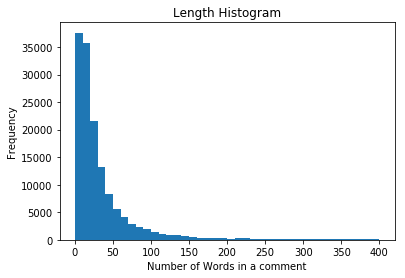

In [20]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length Histogram")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()


We are plotting the overal distribution of words in toxic and non-toxic comments. 

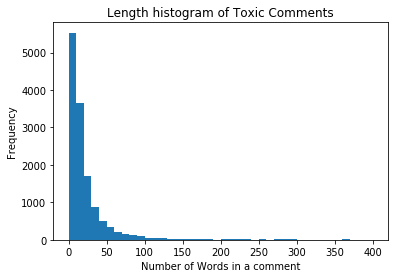

In [21]:
plt.clf()
ToxicNumWords = [len(one_comment) for one_comment in toxicX_train]
plt.hist(ToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length histogram of Toxic Comments")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()

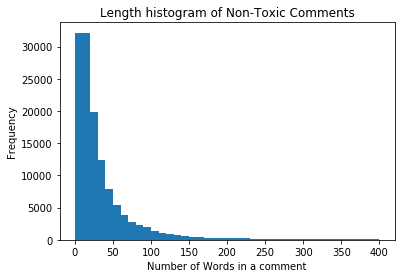

In [22]:
plt.clf()
NonToxicNumWords = [len(one_comment) for one_comment in NonToxic_train]
plt.hist(NonToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Number of Words in a comment")
plt.title("Length histogram of Non-Toxic Comments")
plt.ylabel("Frequency")
plt.show()

putting the toxic and non-toxic comments separated numpy arrays # 
Printing the number of nont-toxic and toxic comments #

In [23]:

print (np.asarray(NonToxicNumWords).sum())
ntoxic_text_train=[]
for x in NonToxic_train:
    x=' '.join(x)
    ntoxic_text_train.append(x.encode('utf-8'))

ntoxic_text_train=np.asarray(ntoxic_text_train)

4775000


In [24]:
print(np.asarray(ToxicNumWords).sum())
toxic_text_train=[]
for x in toxicX_train:
    x=' '.join(x)
    toxic_text_train.append(x.encode('utf-8'))

toxic_text_train=np.asarray(toxic_text_train)

397084


In [25]:
print(np.asarray(totalNumWords).sum())
text_train=[]
for x in X_train:
    x=' '.join(x)
    text_train.append(x.encode('utf-8'))

text_test=[]
for x in X_test:
    x=' '.join(x)
    text_test.append(x.encode('utf-8'))
text_train=np.asarray(text_train)
text_test=np.asarray(text_test)

5172084


Plotting the pie histogram of imbalanced number of (toxic, non-toxic) comments

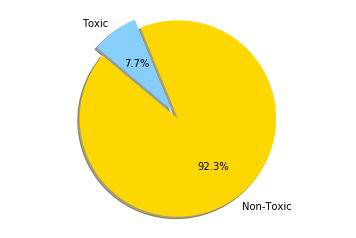

In [26]:
import matplotlib.pyplot as plt
 
# Data to plot
labels ='Non-Toxic', 'Toxic'
#title="Imbalanced classes"
sizes = [4774994, 397084]
colors = ['gold', 'lightskyblue']#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


Importing keras libraries for both tokenizing and LSTM-RNN classification

Tokenizing the comments

Later, I printed the most common words for both toxic and non-toxic comments separated.

<a id="results"></a>
## Results

<a href="#top">Back to Top</a>

In order to apply NLP algorithms, we need to call Keras and Tensorflow libraries. To do so, first we would install these libraries and then import them

> Need a section that describes NLP. 
>> Describe tokenization, stem words, etc. The audience is technical, but these concepts need to be explained.



Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

It applies to our case, that we rain the machine to identify a human written language comment as a toxic or not. 

Tokenization: A sentence can be considered as a list of words, knowing the words is crucial to know the content. Tokenizing is step that break a sentence to list of words. 

Stem: it is converting a word to its root, by doing so, the number of words in our features reduced significantly, but the content has not been affected/ 

In [27]:
from keras.preprocessing.text import Tokenizer
# Any results you write 

from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import GlobalMaxPool1D
from keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
list_text_train=[]
L=np.asarray(text_train).tolist()
for i in range(len(L)):
    list_text_train.append(str(L[i]))
    
tokenizer.fit_on_texts(list_text_train)

Using TensorFlow backend.


Now, we are taking a look at number of words in non-labled and labled comments. Since we have tokenized the comments, we are able to sort and analyze these sentences.

In [28]:
import operator
z=tokenizer.word_counts
sorted_tokens = sorted(z.items(), key=operator.itemgetter(1))
L=len(sorted_tokens)
print("Popular words in non-labeled Comments")
print(L)
for i in range(L-1,L-20,-1):
    print(sorted_tokens[i])

Popular words in non-labeled Comments
192921
('article', 64071)
('page', 49322)
('wikipedia', 41866)
('use', 29122)
('talk', 28721)
('xe2', 27586)
('one', 26770)
('make', 26756)
('would', 25639)
('like', 25188)
('edit', 24562)
('x80', 23781)
('please', 23433)
('see', 21872)
('say', 21817)
('think', 20376)
('know', 20330)
('source', 20132)
('get', 19050)


In this step, we are making a list of toxic comments and then we will sort them.

In [29]:
ToxicTokenizer = Tokenizer(num_words=max_features)
list_toxic_text_train=[]
L=np.asarray(toxic_text_train).tolist()
for i in range(len(L)):
    list_toxic_text_train.append(str(L[i]))

ToxicTokenizer.fit_on_texts(list(np.asarray(list_toxic_text_train)))

In [30]:
tz=ToxicTokenizer.word_counts
toxic_sorted_tokens = sorted(tz.items(), key=operator.itemgetter(1))

Okay, now let's take a look at popular toxic comments.

In [31]:
tL=len(toxic_sorted_tokens)
#print L
print("Popular words in Toxic Comments")
for i in range(tL-1,tL-20,-1):
    print(toxic_sorted_tokens[i])

Popular words in Toxic Comments
('fuck', 9279)
('suck', 4234)
('like', 3230)
('wikipedia', 3200)
('shit', 3192)
('go', 3170)
('u', 3064)
('nigger', 2984)
('get', 2623)
('page', 2197)
('know', 2118)
('hate', 2047)
('die', 2039)
('gay', 2024)
('bitch', 1908)
('faggot', 1854)
('moron', 1807)
('make', 1767)
('fucking', 1686)


Here, we are making a list of non toxic comments and then we would sort them accordingly.

In [32]:
NonToxicTokenizer = Tokenizer(num_words=max_features)
list_ntoxic_text_train=[]
L=np.asarray(ntoxic_text_train).tolist()
for i in range(len(L)):
    list_ntoxic_text_train.append(str(L[i]))

NonToxicTokenizer.fit_on_texts(list_ntoxic_text_train)

In [33]:
ntz=NonToxicTokenizer.word_counts
ntoxic_sorted_tokens = sorted(ntz.items(), key=operator.itemgetter(1))

Now, let's take a look at popular non-toxic comments.

In [34]:
nL = len(ntoxic_sorted_tokens)
print( "Popular words in Non-Toxic Comments")
print (L)
for i in range(nL-1,nL-20,-1):
    print (ntoxic_sorted_tokens[i])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



> This seems to be a reasonable alternative. Need to explain why and have a model to compare to LSTM.

In a comparison, we need to common benchmark model to compared against our choice of solution. That helps to communicate the results with other audiances. 
Specially when the new model is not well-versed or complex by nature. Comparing with simple benchmark model help to relae to results. The next section is applying the benchmark model: tf-idf for Multinomil NB classifier. 

# Tf-idf transformation to be fed in Multinomial NB classifier



In order to feed the data to any of NLP algorithm, we need to convert the text into sequence in both train and text dataset. 

In [35]:
list_text_train=[]
L=np.asarray(text_train).tolist()
for i in range(len(L)):
    list_text_train.append(str(L[i]))
    
list_text_test=[]
L=np.asarray(text_test).tolist()
for i in range(len(L)):
    list_text_test.append(str(L[i]))    

list_tokenized_train = tokenizer.texts_to_sequences(list_text_train) 
list_tokenized_test = tokenizer.texts_to_sequences(list_text_test)  

Now, let's convert a collection of raw documents to a matrix of TF-IDF features.

In [36]:
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(
            max_df=0.90,
            max_features=20000,
            encoding='latin1',
            preprocessor=None, lowercase=False)
tfidf.fit(list(np.asarray(text_train)))
tfidf_text_train =tfidf.transform(list(np.asarray(text_train)))
tfidf_text_test =tfidf.transform(list(np.asarray(text_test)))
print(tfidf_text_train.shape[:])
print(tfidf_text_test.shape[:])
#print ZZ[1,1]

(143613, 20000)
(15958, 20000)


# Multinomial NB classifier

Well, we are settign NB as a benchmark for our analysis and then compare any other algorithm with NB. First, we should read MultinomioalNB from SKlearn. We would call the model and then fit the model.

In [37]:
from sklearn.naive_bayes import MultinomialNB
nbClf=MultinomialNB()
nbClf.fit(tfidf_text_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Now, we are predicting the lables of the test comments using training model.

In [38]:
tfidfPredicted=nbClf.predict(tfidf_text_test) ## Predicting the labels of test comments ##

# Applying the metrics to check the performance our benchmark model

Next, let's check the performance of NB using different metrics including, f1 score, confusion matrix, recall score and accuracy.

In [39]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

tfIDF=[]
for i in range(len(tfidfPredicted)):
    tfIDF.append(int(tfidfPredicted[i]))

Y_test=y_test.tolist()
Y=[]
#print()
for i in range(len(y_test)):
#    print(i)#y_test[i])
    Y.append(int(Y_test[i]))
    
    
#fIDF)
records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
#        print(j)
#        print(metric(y_test,tfidfPredicted))
        print(tfidfPredicted)
        
#        print(y_test)
        records[metric_name][list_classes[j]]=metric(Y,tfIDF) ## Measuring the metrics ##

['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


It has reseanable performance, let's pring the metrics performance for future reference.

In [40]:
# Pretty printing of the metrics #
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.9467351798470987},
 'confusion_matrix': {'toxic': array([[14366,    49],
       [  801,   742]], dtype=int64)},
 'f1': {'toxic': 0.6358183376178235},
 'f2': {'toxic': 0.532816314806836},
 'hamming_loss': {'toxic': 0.05326482015290136},
 'precision': {'toxic': 0.9380530973451328},
 'recall': {'toxic': 0.48088139987038236}}


# Plotting the resulted confusion matrix for tf-idf+Multinomial NB

Let's dig furthur into NB modle using tf_idf (text frequenche charackteristics). Further explanation is in: 
https://sebastianraschka.com/Articles/2014_naive_bayes_1.html

In [41]:
## Use sklearn notes: link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
## Confusion matrix plotter ## 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14366    49]
 [  801   742]]


<Figure size 432x288 with 0 Axes>

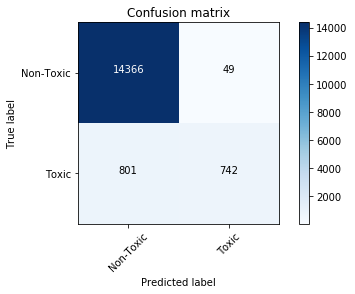

In [42]:
#print records["confusion_matrix"]["toxic"]
#import plot_confusion_matrix
plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"])

We have used a code suggested in sklearn for plotting confusion matrix, check the  plot_confusion_matrix.py in this folder
The link is documented inside its file 

Normalized confusion matrix
[[0.99660076 0.00339924]
 [0.5191186  0.4808814 ]]


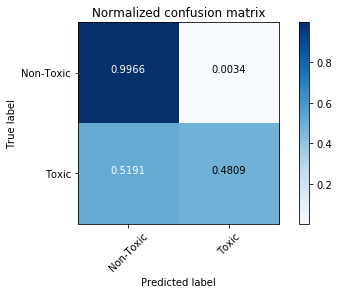

In [43]:

from plot_confusion_matrix import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=True,title='Normalized confusion matrix')
plt.show()

# Naive classifier, consider all comments as non-toxic

This section is an exercise if we consider all comments as non-toxic

In [44]:
naivePred=np.zeros(tfidfPredicted.shape[:])
tfidfPredicted.shape[:]
naiveRecords = defaultdict(dict)

tfIDF=[]
for i in range(len(tfidfPredicted)):
    tfIDF.append(int(tfidfPredicted[i]))

Y_test=y_test.tolist()
Y=[]
#print()
for i in range(len(y_test)):
#    print(i)#y_test[i])
    Y.append(int(Y_test[i]))
    



for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
        naiveRecords[metric_name][list_classes[j]]=metric(Y,naivePred)

C:\Users\sarazaheri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarazaheri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarazaheri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Performance of naive classifier with confusion matrix plot

In [46]:
from pprint import pprint
pprint(dict(naiveRecords))

{'accuracy': {'toxic': 0.9033086852989096},
 'confusion_matrix': {'toxic': array([[14415,     0],
       [ 1543,     0]], dtype=int64)},
 'f1': {'toxic': 0.0},
 'f2': {'toxic': 0.0},
 'hamming_loss': {'toxic': 0.09669131470109037},
 'precision': {'toxic': 0.0},
 'recall': {'toxic': 0.0}}


Confusion matrix, without normalization
[[14415     0]
 [ 1543     0]]


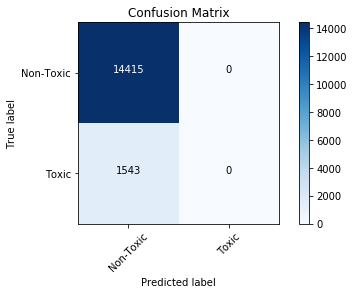

In [47]:
# plt.clf()
plt.figure()
plot_confusion_matrix(naiveRecords["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

# Start the phase for Solution model, LSTM-RNN
Start padding the comments with fixed size of 100, chosen from comment length distribution 

In [67]:
maxlength=100
paddedTrain=pad_sequences(list_tokenized_train,maxlen=maxlength) # Padding the traning section
paddedTest=pad_sequences(list_tokenized_test,maxlen=maxlength) # Padding the testing section 

Now, let define LSTM classifiers. We are defining hyper-features of classifies and then return the model.

In [68]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import GlobalMaxPool1D
from keras.layers import Dropout
from keras.models import Sequential 

def LSTM_Classifier(embDim=128, lstmDim=60, hidDim=50, outDim=6, maxlen=50, max_features=20000):
    model=Sequential()
    model.add(Embedding(max_features, embDim, input_length=maxlen))
    model.add(LSTM(lstmDim, return_sequences=True, name='lstm_layer'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.1))
    model.add(Dense(hidDim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(outDim, activation='sigmoid'))
#    model=Model(inp,x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
#    model.summary()
    return model 

## LSTM Architecture #

> I am totally on board with using LSTM as primary method of analysis. That said:

> We need a strong baseline measurement. 
>> This allows us to say, "LSTM performed x percent better than our baseline.

> The LSTM Architeture is one of the most important parts of the report. You can standout by displaying a deep knowledge of the intricacies of the algorithm.

> You need to have a writeup describing **LSTM**....very detailed!!!!

> This also means that you are going to need to have a brief writeup describing **Deep Learning**

> Why are you using these embedded dimension and why 128. Same for the rest of the diminsions and features?

> Why you using a dropout ratio of 0.1?

> Justify and explain the loss, optimizer, and metrics functions. What are the alternatives and why did you use these?


# Deep Learning 
Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.


# Long short term memory (LSTM)
Traditional neural networks cannot remember more of the past, but only the recent past (short term memory) and this is considered as a shortcoming of these networks. Recurring neural networks (RNN) can fix this problem (more on this at http://karpathy.github.io/2015/05/21/rnn-effectiveness/). LSTM is actually a special kind of RNN which is capable of learning long term dependencies. To solve sequencing classification and prediction modelling, we actually need the neural network to remember the past sequence so that we can classify or predict the sequence. I would recommend reading more about RNN and LSTM if you don’t know much about these topics. The section below explains how we can implement LSTM and solve the sequence classification problem.

# Embeded Dimention:
Word terms are sparce data, by itself it does not have an algebric way to compare terms with each other. We need to correspond each word to quantiative vector. To such purpose, you can choose the dimension of the vector, and it is a parameter needed to be tuned. 
Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.

## Lost, optimizer, metric function ##
loss='binary_crossentropy'
it measures whether we reach better classification. It tracks the training. 

Metric= Accuracy
Over training, we try to have better classification, the measure is accuracy (number of True classified items over all). There are pool of options such as Recall, or $F_b$ which help to measure whether our prediction is relaibale rather than how many good predictions you made. That is essenstial useful when the data is imbalanced. Naive claasifier just based on statistics can reach good accuracy but miss one label. 

Optimizer:
It is way you solve the gradient decent, in brief in what set of weights your reach minumum loss, it is searching algorithm over the weights space with regard to loss. What numerical approach you choose is under flag of optimizer. Adam is one of the known optimizer which applies the momentum in order to avoid local minimas. 

## Hyperparameters:
Learning rate=0.1, vector dimension=128, number of epochs=5 are our parameters are chosen. I have not done Hyperparamter tunning intesively, Over a few choices, we chose these parameters. However, that is open for further discussion and research. 



In [69]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import GlobalMaxPool1D
from keras.layers import Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

def LSTM_Classifier(embDim=128, lstmDim=60, hidDim=50, outDim=6, maxlen=50, max_features=20000):
    model=Sequential()
    model.add(Embedding(max_features, embDim, input_length=maxlen))
    model.add(LSTM(lstmDim, return_sequences=True, name='lstm_layer'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.1))
    model.add(Dense(hidDim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(outDim, activation='sigmoid'))
#    model=Model(inp,x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
#    model.summary()
    return model 

Having the classifeirs, it is time to import classifeirs and then saved teh trained weights for extended use.

> Need to discuss the following: **Feedfoward Networks, Recurrent Networks, Backpropagation, Vanishing and exploding gradients** 

## Feedfoward Networks
The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network.

## Recurrent Networks
A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

## Backpropagation
In machine learning, specifically deep learning, backpropagation (backprop, BP) is an algorithm widely used in the training of feedforward neural networks for supervised learning; generalizations exist for other artificial neural networks (ANNs), and for functions generally. Backpropagation efficiently computes the gradient of the loss function with respect to the weights of the network for a single input-output example. 

## Vanishing and exploding gradients.
In machine learning, the vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value.

In [71]:
# Importing LSTM Classifier,
#I have written a function for making the architecture using the given inputs for LSTM classifier #
checkCLF=LSTM_Classifier(embDim=128, lstmDim=60, hidDim=50, outDim=1, maxlen=100)
checkCLF.summary()
Path='weights.best.RNN.' # I saved the trained weights for extended use and transfer learning # 
checkpoint=ModelCheckpoint(filepath=Path,
                           verbose=1, save_best_only=True)
                               

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 100, 60)           45360     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 60)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                3050      
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total para

## Fitting the model #

It is time to fit the model with our train data. We are using Epochs approach. In this approch, that is similar to Cross validation, we are choosing the epochs that gives the best accuracy and use that model for validation.

> 5 epochs is not enough, not nearly enough. I could run this through AWS to save time.

> Need a good explanation as to what is going on here. ie, why this validation split, why this batch size

> We need to discuss **LSTM Hyperparameter Tuning**

## Hyperparameters:
Learning rate=0.1, vector dimension=128, number of epochs=5 are our parameters are chosen. I have not done Hyperparamter tunning intesively, Over a few choices, we chose these parameters. However, that is open for further discussion and research. 


In [72]:
epochs=5
history=checkCLF.fit(paddedTrain, y_train, validation_split=0.1,
                epochs=epochs,
                batch_size=256,
                callbacks=[checkpoint], verbose=1,
                )

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 129251 samples, validate on 14362 samples
Epoch 1/5
129251/129251 [==============================] - 260s 2ms/step - loss: 0.1944 - acc: 0.9370 - val_loss: 0.1152 - val_acc: 0.9597

Epoch 00001: val_loss improved from inf to 0.11517, saving model to weights.best.RNN.
Epoch 2/5
129251/129251 [==============================] - 220s 2ms/step - loss: 0.1000 - acc: 0.9636 - val_loss: 0.1133 - val_acc: 0.9601

Epoch 00002: val_loss improved from 0.11517 to 0.11327, saving model to weights.best.RNN.
Epoch 3/5
129251/129251 [==============================] - 186s 1ms/step - loss: 0.0786 - acc: 0.9708 - val_loss: 0.1323 - val_acc: 0.9577

Epoch 00003: val_loss did not improve from 0.11327
Epoch 4/5
129251/129251 [==============================] - 186s 1ms/step - loss: 0.0603 - acc: 0.9783 - val_loss: 0.1452 - val_acc: 0.9518

Epoch 00004: val_loss did not improv

In this step, we predict the model in test data set

In [73]:
BestTrainPred=checkCLF.predict(paddedTrain) ## Predicting the results for test and training section using trained LSTM Classifier ##
BestTestPred=checkCLF.predict(paddedTest)

Here, we are evaluating the predicted model using probablistics metrics with threshhold of 0.5.

In [77]:
## binary formatting the probability predictions ## 
# Setting the threshhold 0.5 #
BinaryTrainPred=np.zeros(BestTrainPred.shape[:])
BinaryTestPred=np.zeros(BestTestPred.shape[:])

for i in range(len(BestTrainPred)):
    for j in range(1):
        if BestTrainPred[i,j] >= 0.5:
            BinaryTrainPred[i,j]=1
        else:
            BinaryTrainPred[i,j]=0
            
for i in range(len(BestTestPred)):
    for j in range(1):
        if BestTestPred[i,j] >= 0.5:
            BinaryTestPred[i,j]=1
        else:
            BinaryTestPred[i,j]=0

## Start measuring the metrics over the performance of our solution model #

> Nice work here. I like how you are using a confusion matrix to measure the performance of the model.

> Have a writeup of the metrics that you are using. What led you to use a confusion matrix. Is this the best option? What are the alternatives?

In a binary classification, there are two labels, which are number of true labels for each category. 
After classification, there are two group of classified or predicted labels. In overall, for each input you have four combinations of options
(Predicted=(0,1),True=(0,1)). Confusion matrix captures all these possible outcomes. That is why for binary classification, it is the complete projection of results. From confusion matrix, we can measure scaler metrics such as accuracy and recall. Recall measures the reliability of prediction. It is essential specially in imbalanced data set which is our case. 

In [78]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import jaccard_similarity_score
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

ytest=y_test.tolist()
Y=[]
for i in range(len(ytest)):
    Y.append(int(ytest[i]))

records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    records[metric_name][list_classes[0]]=metric(Y,BinaryTestPred[:,0])
    

In [79]:
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.9528763002882567},
 'confusion_matrix': {'toxic': array([[14180,   235],
       [  517,  1026]], dtype=int64)},
 'f1': {'toxic': 0.7318116975748931},
 'f2': {'toxic': 0.6901654782725682},
 'hamming_loss': {'toxic': 0.04712369971174333},
 'precision': {'toxic': 0.8136399682791435},
 'recall': {'toxic': 0.6649384316267012}}


## Plotting confusion matrix for LSTM (Solution model) #

In [82]:
## Use sklearn notes: link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
## Confusion matrix plotter ## 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14180   235]
 [  517  1026]]


<Figure size 432x288 with 0 Axes>

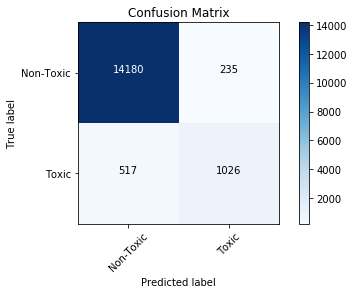

In [83]:

plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

Normalized confusion matrix
[[0.98369754 0.01630246]
 [0.33506157 0.66493843]]


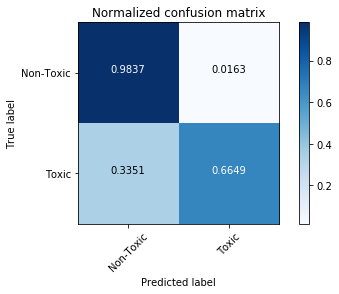

In [84]:
# I have used a code suggested in sklearn for plotting confusion matrix, check the  plot_confusion_matrix.py in this folder
# The link is documented inside its file 
from plot_confusion_matrix import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=True,title='Normalized confusion matrix')
plt.show()

<a id="conclude"></a>

## Conclusion

<a href="#top">Back to Top</a>

<a id="ref"></a>

## References

<a href="#top">Back to Top</a>

<a id="append"></a>

## Appendix

<a href="#top">Back to Top</a>